# Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

import warnings 
warnings.filterwarnings('ignore')

# Data Preprocessing

In [2]:
gold_data = pd.read_csv('/kaggle/input/gold-price-data/gld_price_data.csv')
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [3]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [4]:
gold_data.shape

(2290, 6)

In [5]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [6]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [7]:
gold_data.duplicated().sum()

0

In [8]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [9]:
df = gold_data.drop(columns = "Date", axis= 1)

In [10]:
df.head()

,SPX,GLD,USO,SLV,EUR/USD
0,1447.160034,84.860001,78.470001,15.180,1.471692
1,1447.160034,85.570000,78.370003,15.285,1.474491
2,1411.630005,85.129997,77.309998,15.167,1.475492
3,1416.180054,84.769997,75.500000,15.053,1.468299
4,1390.189941,86.779999,76.059998,15.590,1.557099


correlation : 
1. Positive correlation
2. Negative correlation

In [11]:
correlation = df.corr()

### Constructing a heatmap to understand the correlation

<Axes: >

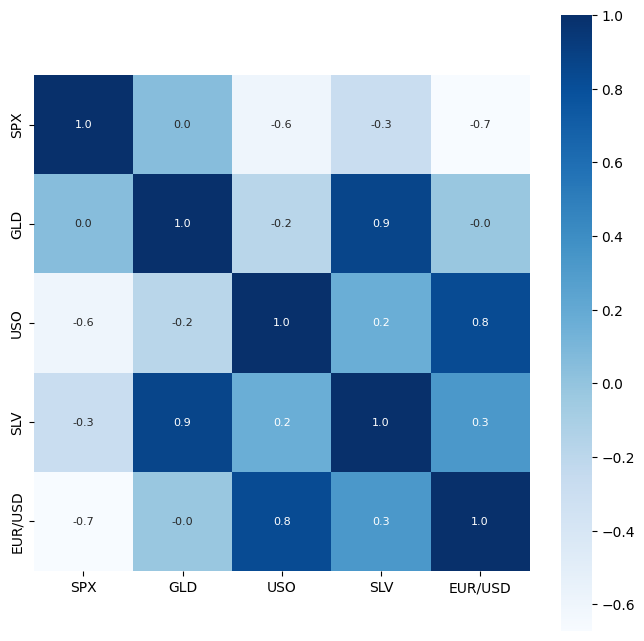

In [12]:
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar = True, square= True, fmt= '.1f', annot = True, annot_kws={'size':8}, cmap ='Blues')

### Correlation values of GLD

In [13]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


### Checking the distribution of the GLD price

<Axes: xlabel='GLD', ylabel='Density'>

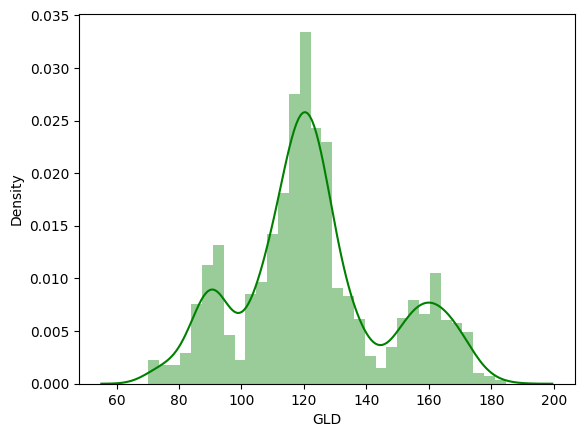

In [14]:
sns.distplot(df['GLD'],color='green')

# Splitting the Features and Targets 

In [15]:
x = df.drop(['GLD'], axis =1 ) # FEATURES
y= df['GLD']  # Target

In [16]:
print(x)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [17]:
print(y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


# Splitting into Training data and Test data 

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state= 2)

# Model Training : Random Forest Regressor

In [19]:
regressor = RandomForestRegressor(n_estimators=100)

## Training the model

In [20]:
regressor.fit(x_train, y_train)

RandomForestRegressor()

# Model Evaluation

## Prediction on Test Data

In [21]:
test_data_pred = regressor.predict(x_test)

In [22]:
print(test_data_pred)

[168.6263997   81.70750012 115.81080016 127.70650058 120.75960179
 154.87089779 150.54709805 126.06340062 117.60549864 125.94000083
 116.39190126 171.44440077 141.87269915 167.98509868 115.06600036
 117.48570055 139.6521025  169.81700061 159.7068035  159.56749943
 155.18180051 125.29140047 176.33389934 157.47970324 125.16550015
  93.66129974  77.38350051 120.3635999  119.11789954 167.43159998
  88.11600058 125.21530001  91.06360034 117.66260018 121.14419896
 136.59550069 115.69190141 115.32100092 148.7016997  107.48270077
 104.48850249  87.15859813 126.49810056 117.85759999 153.69529908
 119.61709976 108.28660008 108.01299801  93.12260049 127.13259774
  75.00480006 113.64349936 121.43810002 111.12089898 118.86859906
 120.67919915 158.77659953 166.34740156 146.8704968   85.8178986
  94.3991004   86.74479866  90.58460029 119.02580048 126.45730088
 127.56329986 170.42460045 122.23339936 117.37949891  98.51380051
 168.79470144 142.73819862 131.77280207 121.08100208 121.24089928
 119.742800

## R-Squared Error 

In [23]:
error_score = metrics.r2_score(y_test, test_data_pred)
print("R squared error: ", error_score)

R squared error:  0.988575286978078


## Compare the Actual values and Predicted values in a plot

In [24]:
y_test = list(y_test)

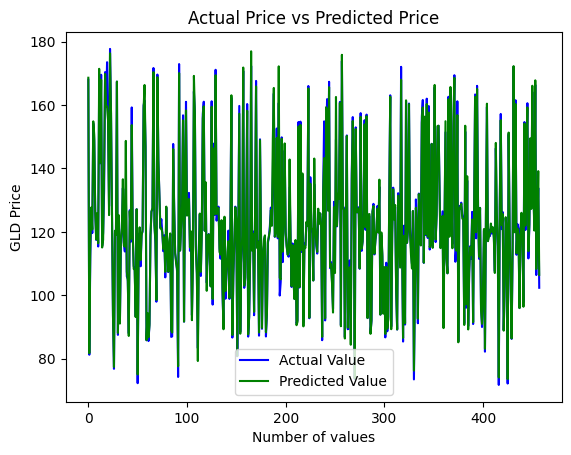

In [25]:
plt.plot(y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_pred, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

# Build a predictive system

In [26]:
input_data = [ 1547.162234 , 88.475601,  45.2200 , 9.971462]

# changing input_data to a numpy array
input_data_as_numpy_arr = np.asarray(input_data)

# Reshape the array 
input_data_reshapped = input_data_as_numpy_arr.reshape(1,-1)

#prediction 
prediction = regressor.predict(input_data_reshapped)
print(prediction)

print('The gold price is :', prediction)

[149.59740129]
The gold price is : [149.59740129]
